# Ejercicio 1
Implemente las estructuras de datos y algoritmos básicos para la solución de un problema mediante algoritmos genéticos. Pruebe estas rutinas y compare los resultados con un método de gradiente descendiente para buscar el mínimo global de las siguientes funciones:

In [56]:
from matplotlib import pyplot as plt
import numpy as np
import math
import string
import random

## Funcion 1

1. $ f(x) = - x \sin(\sqrt{|x|}) $, con $ x \in [-512...512] $

Podemos considerar la codificación de un número decimal entre -512 y 512 teniendo en cuenta reales con un cromosoma de 14 genes, de la siguiente manera:

1 bit para el signo (0 para negativos, 1 para positivos)

9 bits para representar los enteros

4 bits para representar los decimales

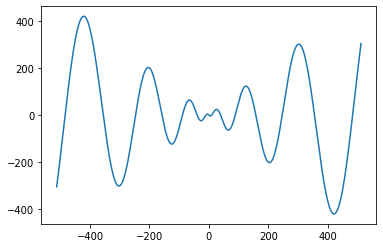

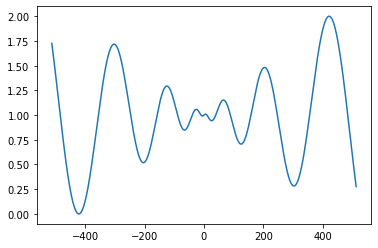

In [160]:
def func_1 (x):
    f_x = - x * np.sin(np.sqrt(abs(x)))
    return f_x

### Inicialización al azar

In [167]:
def generate_bin(n_bits):
    # n_bits = cantidad de bits para la parte entera considerando 1 para el signo

    # elijo al azar una cadena de digitos en [0,1] para generar los cromosomas aleatorios
    source = string.digits[:2]
    chrom = ''.join((random.choice(source) for i in range(n_bits + 4)))
    for s in chrom:
        # si los bits designados para la parte decimal (4) son mayores que 9 se consideran 9
        if int(chrom[-4:],2) > 9:
            chrom = chrom[:-4] + '1001'
    return chrom

def initialize(n_ind, bits):
    # n_ind: cantidad de individuos
    poblation = []
    for i in range(n_ind):
        poblation.append(generate_bin(bits))
    return poblation

def bin2dec(b):
    # compongo el número teniendo en cuenta que el primer
    # bit es para el signo y que los 4 últimos son la parte decimal
    d = int(b[1:-4], 2) + 0.1 * int(b[-4:], 2)
    
    if b[0] == '1':
        # si hay un 1 delante, es negativo
        return -d
    else:
        # si hay un 0 delante, es positivo
        return d

def pob_evaluation(p, f_max):
    pob_fitness = []
    mejor_pos = 0
    for ind in p:
        # el fitness se evalúa como 1 - f(x) / f_max ya que buscamos el máximo fitness para el mínimo de una función
        f_actual = 1 - func_1(ind) /f_max
        pob_fitness.append(f_actual)

    return pob_fitness

def roullete_wheel_selection(p_fitness, p):
    p_sum = sum(p_fitness)
    selection_probs = [f/p_sum for f in p_fitness]
    return np.random.choice(len(p), p = selection_probs)


fitness máximo de la generación 0 1.9660141966505313
fitness máximo de la generación 1: 1.9660141966505313
fitness máximo de la generación 2: 1.9754508868661467
fitness máximo de la generación 3: 1.9660141966505313
fitness máximo de la generación 4: 1.9754508868661467
fitness máximo de la generación 5: 1.9660141966505313
fitness máximo de la generación 6: 1.9754508868661467
fitness máximo de la generación 7: 1.9754508868661467
fitness máximo de la generación 8: 1.9660141966505313
fitness máximo de la generación 9: 1.9660141966505313
fitness máximo de la generación 10: 1.9754508868661467
fitness máximo de la generación 11: 1.9754508868661467
fitness máximo de la generación 12: 1.9754508868661467
fitness máximo de la generación 13: 1.9660141966505313
fitness máximo de la generación 14: 1.9754508868661467
fitness máximo de la generación 15: 1.9660141966505313
fitness máximo de la generación 16: 1.9754508868661467
fitness máximo de la generación 17: 1.9660141966505313
fitness máximo de la 

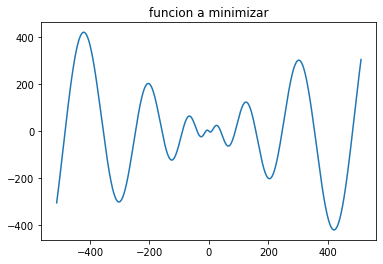

In [201]:
# inicializo la población
n_ind = 30                         # cantidad de individuos
n_bits = 10                        # cantidad de bits para la parte entera

pob = initialize(n_ind, n_bits)

# Funcion a maximizar 
x = np.arange(-512, 512, 0.1)
plt.plot(x, func_1(x)), plt.title('funcion a minimizar')
a = np.max(func_1(x)) # uso esto para hacer que la f de fitness de valores positivos


# decodificación a reales para poder evaluar la f de fitness
pob_real = []
for i in range(n_ind):
    pob_real.append(bin2dec(pob[i]))

# criterios de finalización
fitness_th = 10                 # fitness buscado
gen_max = 100                    # cantidad maxima de generaciones
# otros parámetros
p_cruza = 0.8                   # probabilidad de cruza
p_mutacion = 0.1                # probabilidad de mutación
punto_cruza = int(0.7 * n_bits) # a partir de donde cruzo

#evaluación inicial
pob_fitness = pob_evaluation(pob_real, a)
print('fitness máximo de la generación 0', np.max(pob_fitness))

n_gen = 0
while(n_gen < gen_max):
    # Selección de padres: elijo 30 padres con el metodo elegido
    prog_idx = []
    for i in range (n_ind):
        prog_idx.append(roullete_wheel_selection(pob_fitness, pob_real))

    # Cruza
    # inicializo la nueva población
    prox_pob = []
    # repito n_ind/2 veces elección de 2 padres y realización de la cruza (o no)
    n_cruzas = int(n_ind/2)
    for i in range(n_cruzas):
        padre = pob[2 * i]
        madre = pob[2 * i + 1]
        # elijo un rand entre 0 y 1
        c_cruza = np.random.rand()
        if c_cruza < p_cruza:
            # se realiza la cruza: tomo desde el punto de cruza hasta la cantidad de bits
            # que considero para la parte entera
            hijo1 = padre[0 : punto_cruza] + madre[punto_cruza:]
            hijo2 = madre[0 : punto_cruza] + padre[punto_cruza:]
            # print(f'padre: {pob[i]} - madre: {pob[i+1]} - hijo1: {hijo1} - hijo 2: {hijo2}')
            prox_pob.append(hijo1)
            prox_pob.append(hijo2)
            # print('se hizo la cruza')
        else:
            # se mantienen los padres en la nueva población
            prox_pob.append(padre)
            prox_pob.append(madre)
            # print('no se hizo la cruza')

    # Mutación
    for i, ind in enumerate(prox_pob):
        # elijo un rand entre 0 y 1
        c_mutacion = np.random.rand()
        # print('cromosoma sin mutar', ind)
        if c_mutacion < p_mutacion:
            # se realiza la mutación teniendo en cuenta que se hace en los bits de los enteros
            pos_mutacion = 1 + np.random.choice(n_bits)
            l_ind = list(ind)
            if l_ind[pos_mutacion] == '0':
                l_ind[pos_mutacion] = '1'
            else:
                l_ind[pos_mutacion] = '0'
            ind = ''.join(l_ind)
            # print('cromosoma mutado', ind)
        prox_pob[i] = ind

    # Se evalúa la nueva población
    pob = prox_pob
    # decodificación a reales para poder evaluar la f de fitness
    pob_real = []
    for i in range(n_ind):
        pob_real.append(bin2dec(pob[i]))
    pob_fitness = pob_evaluation(pob_real, a)
    print(f'fitness máximo de la generación {n_gen + 1}: {np.max(pob_fitness)}')
    n_gen += 1


In [189]:
np.random.choice(10)

0

## Funcion 2
2. $ f(x) = x + 5 \sin(3x) + 8 \cos (5 x)$, con $x \in \mathbb R $ en el intervalo $[0...20]$

In [ ]:
def func_2 (x):
    f_x = x + 5 * np.sin(3 * x) + 8 * np.cos(5 * x)
    return f_x

## Funcion 3
3. $ f(x, y) = (x^2 + y^2)^{0.25} [\sin^2 (50 (x^2 + y^2)^{0.1}) + 1]$, con $x, y \in [-100...100]$